In [1]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
model = tf.saved_model.load(r'C:\Users\yongw\Desktop\Project\TFObjectDetection\TFObjectDetection\workspace\models\my_ssd_mobnet\export\saved_model')

In [36]:
image_path = r'C:\Users\yongw\Desktop\Project\TFObjectDetection\TFObjectDetection\workspace\images\test\Cars389.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_tensor = tf.convert_to_tensor(image)
image_tensor = image_tensor[tf.newaxis, ...]

In [37]:
detections = model(image_tensor)

In [38]:
labels = [{'name':'licence', 'id':1}]
class_labels = {label['id']: label['name'] for label in labels}

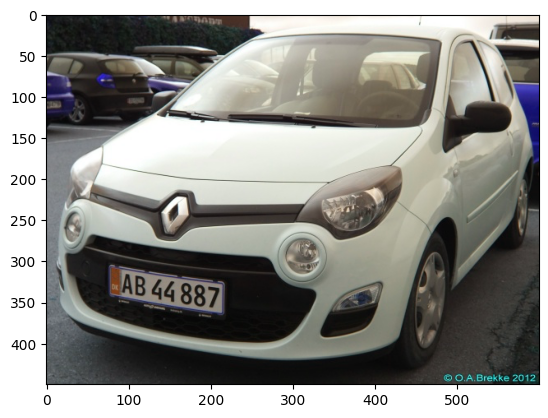

In [39]:
boxes = detections['detection_boxes'][0].numpy()
classes = detections['detection_classes'][0].numpy().astype(np.uint32)
scores = detections['detection_scores'][0].numpy()

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image_rgb)

# Iterate over the detected objects and print their details
for i in range(len(boxes)):
    ymin, xmin, ymax, xmax = boxes[i]
    class_id = classes[i]
    score = scores[i]

    # Display only the objects with a score greater than 0.8
    if score > 0.8:
        class_label = class_labels.get(class_id, 'Unknown')
        
        # Draw bounding boxes on the image
        rect = plt.Rectangle((xmin * image.shape[1], ymin * image.shape[0]),
                             (xmax - xmin) * image.shape[1], (ymax - ymin) * image.shape[0],
                             fill=False, edgecolor='g', linewidth=2)
        ax.add_patch(rect)
        
        # Put the class label and score on the image
        label = f"{class_label}: {score:.2f}"
        ax.text(xmin * image.shape[1], ymin * image.shape[0] - 10, label,
                bbox=dict(facecolor='g', alpha=0.5),
                fontsize=10, color='white')
        
        # Print the class label and score
        print(f"Object {i+1}: Class {class_label}, Score {score}")

# Show the plot
plt.show()